### 🌟 1. Problem Statement
---

**Tujuan:**  
Memprediksi harga kos secara akurat berdasarkan fitur-fitur properti, lokasi, rating, review, dan fasilitas.

**Tipe Masalah:**  
Regresi (karena target berupa nilai harga).

**Problem Statement:**  
Bagaimana membangun model machine learning yang dapat memprediksi harga kos dari data fitur seperti lokasi, jenis kos, rating, jumlah review, dan fasilitas secara otomatis

### 📥 2. Data Collection
---

In [158]:
import pandas as pd

# Load data raw
df_raw = pd.read_json('../data/data-model/raw/data-scrape.json')

df_raw.head()

,nama_kos,jenis_kos,area,rating,jumlah_review,total_transaksi,harga,periode,alamat,fasilitas,peraturan,landmarks,region,url,scraped_at
0,Kost 3tranches Home Radio Dalam Kebayoran Baru...,Kos Campur,Kebayoran Baru,5.0,(1),25 transaksi berhasil di kos ini,Rp3.800.000,/bulan,/bulan,"{'ukuran_listrik': ['3 x 4 meter', 'Tidak term...","[Tipe ini bisa diisi maks. 2 orang/ kamar, Bol...","[{'nama': 'Rumah Makan Sederhana', 'jarak': '1...",jakarta-daerah-khusus-ibukota-jakarta-indonesia,https://mamikos.com/room/kost-south-jakarta-ci...,2025-09-05 13:44:09.585175
1,Kost Apik Rayan Tipe A Cilandak Jakarta Selatan,Kos Campur,Cilandak,4.5,(9),18 transaksi berhasil di kos ini,Rp1.200.000,/bulan,/bulan,"{'ukuran_listrik': ['3.5 x 3.5 meter', 'Termas...","[Tipe ini bisa diisi maks. 2 orang/ kamar, Tid...","[{'nama': 'Warteg Berkah 4', 'jarak': '1.1 km'...",jakarta-daerah-khusus-ibukota-jakarta-indonesia,https://mamikos.com/room/kost-jakarta-selatan-...,2025-09-05 13:44:26.369073
2,Kost Singgahsini Haji Nawi 74 Tipe B Cilandak ...,Kos Campur,Kecamatan Cilandak,4.6,(2),8 transaksi berhasil di kos ini,Rp3.517.000,(Bulan pertama),(Bulan pertama),"{'ukuran_listrik': ['5.5 x 3.5 meter', 'Tidak ...","[Tamu menginap dikenakan biaya, Tipe ini bisa ...","[{'nama': 'Warteg Mamoka Bahari', 'jarak': '31...",jakarta-daerah-khusus-ibukota-jakarta-indonesia,https://mamikos.com/room/kost-kota-jakarta-sel...,2025-09-05 13:44:44.529853
3,Kost Singgahsini Haji Nawi 74 Tipe A Cilandak ...,Kos Campur,Kecamatan Cilandak,4.6,(115),218 transaksi berhasil di kos ini,Rp3.425.000,/bulan,"Pastikan tanggal yang kamu masukkan benar, kar...","{'ukuran_listrik': ['3.5 x 3 meter', 'Tidak te...","[Tamu menginap dikenakan biaya, Tipe ini bisa ...","[{'nama': 'Warteg Mamoka Bahari', 'jarak': '31...",jakarta-daerah-khusus-ibukota-jakarta-indonesia,https://mamikos.com/room/kost-kota-jakarta-sel...,2025-09-05 13:45:04.996868
4,Kost Apik Pondok Jaya VIII Tipe C Mampang Prap...,Kos Putra,Mampang Prapatan,4.4,(18),31 transaksi berhasil di kos ini,Rp1.286.000,(Bulan pertama),(Bulan pertama),"{'ukuran_listrik': ['3 x 1.7 meter', 'Termasuk...","[Tamu boleh menginap, Tamu menginap dikenakan ...","[{'nama': 'Warteg Bu Turah', 'jarak': '2.6 km'...",jakarta-daerah-khusus-ibukota-jakarta-indonesia,https://mamikos.com/room/kost-kota-jakarta-sel...,2025-09-05 13:45:22.083645


In [159]:
print("Shape:", df_raw.shape)

Shape: (4108, 15)


### ⚙️ 3. Data Processing `{data_processing.ipynb}`
---

In [160]:
df = pd.read_csv("../data/data-model/processed/kosprice_processed.csv")
pd.set_option('display.max_columns', None)

df.head

<bound method NDFrame.head of       rating  jumlah_review  total_transaksi     harga  jenis_kos_encoded  \
0      0.875       0.078261         0.082569  0.088803                  0   
1      0.850       0.156522         0.142202  0.095444                  1   
2      0.000       0.000000         0.000000  0.181467                  2   
3      0.950       0.052174         0.036697  0.211197                  1   
4      0.975       0.043478         0.027523  0.130116                  0   
...      ...            ...              ...       ...                ...   
3650   0.000       0.000000         0.000000  0.111969                  2   
3651   0.000       0.000000         0.000000  0.135135                  0   
3652   0.000       0.000000         0.000000  0.127413                  2   
3653   0.000       0.000000         0.000000  0.065637                  2   
3654   0.000       0.000000         0.000000  0.150579                  2   

      area_encoded  region_encoded  harga_log

In [161]:
df.shape

(3655, 248)

In [162]:
df.info

<bound method DataFrame.info of       rating  jumlah_review  total_transaksi     harga  jenis_kos_encoded  \
0      0.875       0.078261         0.082569  0.088803                  0   
1      0.850       0.156522         0.142202  0.095444                  1   
2      0.000       0.000000         0.000000  0.181467                  2   
3      0.950       0.052174         0.036697  0.211197                  1   
4      0.975       0.043478         0.027523  0.130116                  0   
...      ...            ...              ...       ...                ...   
3650   0.000       0.000000         0.000000  0.111969                  2   
3651   0.000       0.000000         0.000000  0.135135                  0   
3652   0.000       0.000000         0.000000  0.127413                  2   
3653   0.000       0.000000         0.000000  0.065637                  2   
3654   0.000       0.000000         0.000000  0.150579                  2   

      area_encoded  region_encoded  harga_l

### 📊 4. Exploratory Data Analysis (EDA)
---

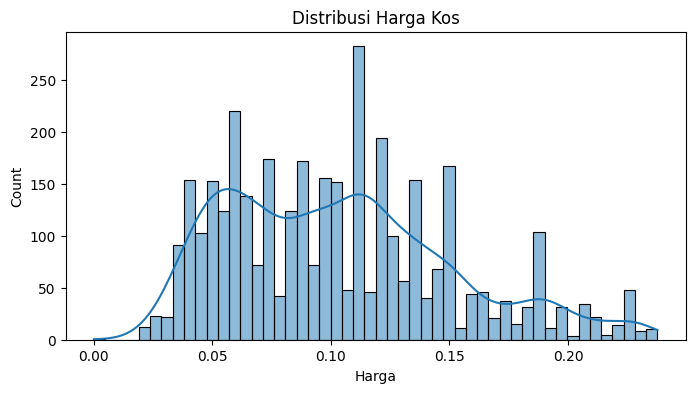

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribusi harga kos
plt.figure(figsize=(8,4))
sns.histplot(df['harga'], bins=50, kde=True)
plt.title('Distribusi Harga Kos')
plt.xlabel('Harga')
plt.show()

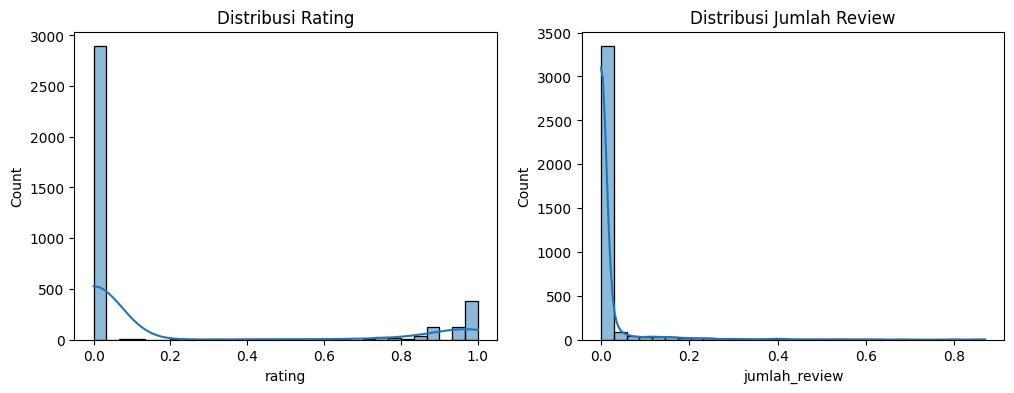

In [164]:
# 2. Distribusi rating dan jumlah review
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['rating'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribusi Rating')
sns.histplot(df['jumlah_review'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribusi Jumlah Review')
plt.show()

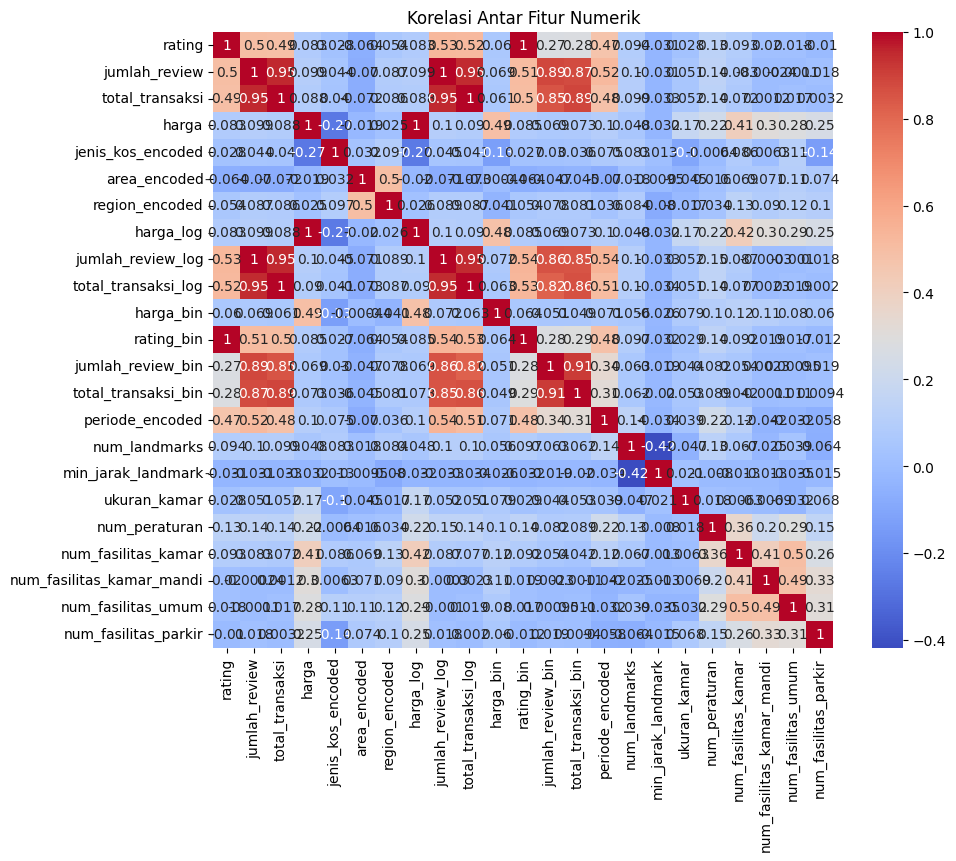

In [165]:
# 3. Korelasi antar fitur numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [166]:
# 4. Rata-rata harga per area
if 'area_encoded' in df.columns:
    print("Rata-rata harga per area:")
    pd.set_option('display.max_rows', None)      # Tampilkan semua baris
    print(df.groupby('area_encoded')['harga'].mean())
    pd.set_option('display.max_rows', 10)        # Kembalikan ke default

Rata-rata harga per area:
area_encoded
0      0.084170
1      0.135521
2      0.117004
3      0.078387
4      0.084053
5      0.094868
6      0.088528
7      0.135917
8      0.131274
9      0.089951
10     0.071942
11     0.086694
12     0.104520
13     0.173745
14     0.081081
15     0.073359
16     0.090203
17     0.096314
18     0.154260
19     0.071283
20     0.102434
21     0.101236
22     0.147233
23     0.102673
24     0.092664
25     0.112179
26     0.108657
27     0.117653
28     0.135135
29     0.124827
30     0.108108
31     0.082046
32     0.113900
33     0.071577
34     0.102220
35     0.101918
36     0.109890
37     0.075290
38     0.110653
39     0.095854
40     0.075290
41     0.093050
42     0.088803
43     0.144788
44     0.091103
45     0.086707
46     0.096525
47     0.160759
48     0.087516
49     0.142857
50     0.057915
51     0.117137
52     0.114659
53     0.104609
54     0.106178
55     0.086680
56     0.090650
57     0.124063
58     0.042471
59     0.096274
6

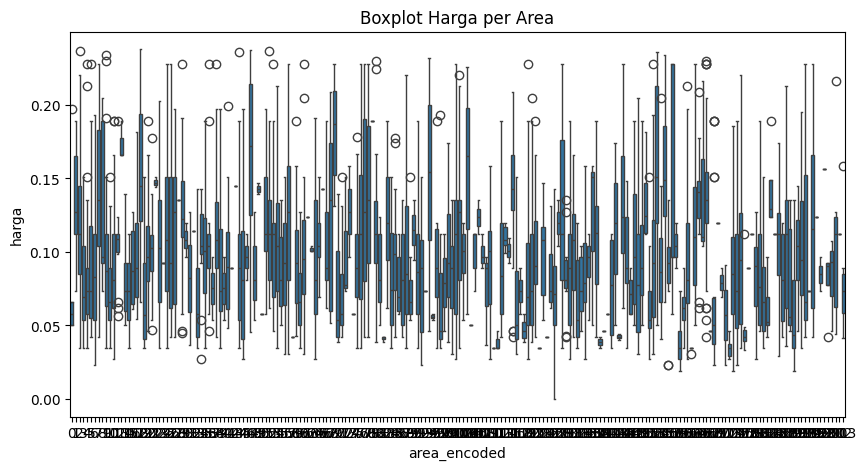

In [167]:
# 5. Boxplot harga per area
if 'area_encoded' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='area_encoded', y='harga', data=df)
    plt.title('Boxplot Harga per Area')
    plt.show()

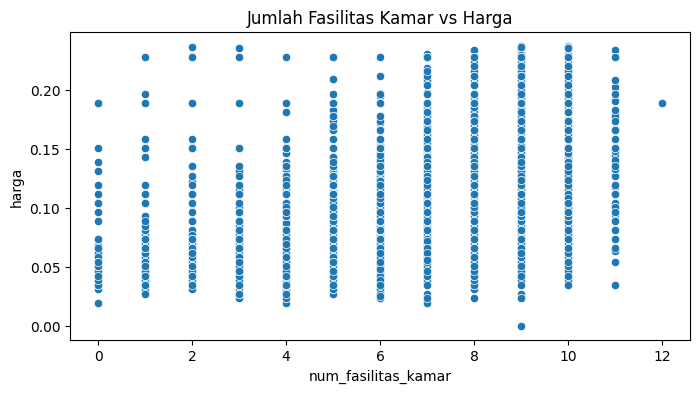

In [168]:
# 6. Pengaruh jumlah fasilitas kamar terhadap harga
if 'num_fasilitas_kamar' in df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x='num_fasilitas_kamar', y='harga', data=df)
    plt.title('Jumlah Fasilitas Kamar vs Harga')
    plt.show()

In [169]:
# 7. Cek missing value
print("Missing value per kolom:")
pd.set_option('display.max_rows', None)      # Tampilkan semua baris
print(df.isnull().sum())
pd.set_option('display.max_rows', 10)        # Kembalikan ke default

Missing value per kolom:
rating                               0
jumlah_review                        0
total_transaksi                      0
harga                                0
jenis_kos_encoded                    0
area_encoded                         0
region_encoded                       0
harga_log                            0
jumlah_review_log                    0
total_transaksi_log                  0
harga_bin                            0
rating_bin                           0
jumlah_review_bin                    0
total_transaksi_bin                  0
jenis_kos_Kos Campur                 0
jenis_kos_Kos Putra                  0
jenis_kos_Kos Putri                  0
area_Alang Alang Lebar               0
area_Balikpapan Kota                 0
area_Balikpapan Selatan              0
area_Balikpapan Tengah               0
area_Balikpapan Utara                0
area_Bandung Wetan                   0
area_Banjarsari                      0
area_Batam Kota                      0


In [170]:
# 8. Distribusi jenis kos (jika ada)
jenis_kos_cols = [col for col in df.columns if col.startswith('jenis_kos_')]
if jenis_kos_cols:
    jenis_counts = df[jenis_kos_cols].sum().sort_values(ascending=False)
    print("Distribusi Jenis Kos:")
    print(jenis_counts)

Distribusi Jenis Kos:
jenis_kos_encoded       3322
jenis_kos_Kos Campur    1705
jenis_kos_Kos Putri     1372
jenis_kos_Kos Putra      578
dtype: int64


#### Kesimpulan EDA
---

1. **Distribusi Harga Kos**  
   Harga sudah di-scaling (0–1), distribusi cukup merata, ada outlier di harga tinggi.  
   *Kesimpulan:* Model perlu robust terhadap outlier.

2. **Distribusi Rating & Jumlah Review**  
   Banyak kos tanpa rating/review (nilai 0), sisanya cenderung tinggi.  
   *Kesimpulan:* Fitur rating/review penting, tapi banyak missing/zero, bisa diolah (impute/binary).

3. **Korelasi Antar Fitur**  
   Harga paling berkorelasi dengan:
   - `num_fasilitas_kamar` (0.41)
   - `num_fasilitas_kamar_mandi` (0.30)
   - `num_fasilitas_umum` (0.28)
   - `num_fasilitas_parkir` (0.25)
   - `num_peraturan` (0.22)
   - `ukuran_kamar` (0.17)  
   *Kesimpulan:* Fasilitas dan ukuran kamar sangat berpengaruh ke harga, bisa diprioritaskan di modeling.

4. **Rata-rata Harga per Area**  
   Ada variasi harga antar area, beberapa area jauh lebih mahal.  
   *Kesimpulan:* Area sangat penting, bisa dipakai untuk segmentasi atau feature interaction.

5. **Distribusi Jenis Kos**  
   Kos campur paling banyak, putri dan putra lebih sedikit.  
   *Kesimpulan:* Bisa jadi feature kategori, atau analisis segmentasi.

6. **Missing Value**  
   Tidak ada missing value di data hasil preprocessing.  
   *Kesimpulan:* Data sudah siap untuk modeling.

7. **Visualisasi**  
   - Boxplot harga per area: banyak area dengan outlier harga tinggi.
   - Scatterplot fasilitas vs harga: semakin banyak fasilitas, harga cenderung naik.

#### Kesimpulan untuk Proses Selanjutnya
---

**Feature Engineering**
- Fokus pada fitur fasilitas, area, ukuran kamar, dan jenis kos.
- Bisa buat fitur baru: total fasilitas, binary rating/review, segmentasi area.
- Interaksi fitur (misal: area x fasilitas).

**Model**
- Model regresi (Linear Regression, Random Forest, XGBoost).
- Cek robust terhadap outlier (gunakan robust scaler atau model tree-based).
- Bisa coba segmentasi per area jika variasi harga sangat tinggi.

**Training**
- Data sudah siap, bisa langsung split train/test.
- Perlu cek distribusi target di train/test agar tidak bias.
- Evaluasi model dengan metrik MAE/MSE dan analisis error di area/fasilitas

### 🛠️ 5. Feature Selection
---

In [171]:
corr_matrix = numeric_df.corr()
target_corr = corr_matrix['harga'].abs().sort_values(ascending=False)
print("Korelasi fitur dengan harga:")
pd.set_option('display.max_rows', None)      # Tampilkan semua baris
print(target_corr)
pd.set_option('display.max_rows', 10)        # Kembalikan ke default

Korelasi fitur dengan harga:
harga                        1.000000
harga_log                    0.999684
harga_bin                    0.494835
num_fasilitas_kamar          0.412776
num_fasilitas_kamar_mandi    0.304120
num_fasilitas_umum           0.283068
jenis_kos_encoded            0.267963
num_fasilitas_parkir         0.250305
num_peraturan                0.220728
ukuran_kamar                 0.170721
jumlah_review_log            0.102102
periode_encoded              0.099986
jumlah_review                0.098611
total_transaksi_log          0.089914
total_transaksi              0.087766
rating_bin                   0.084770
rating                       0.082664
total_transaksi_bin          0.072775
jumlah_review_bin            0.068734
num_landmarks                0.048389
min_jarak_landmark           0.031889
region_encoded               0.025152
area_encoded                 0.019192
Name: harga, dtype: float64


In [172]:
selected_corr_features = target_corr[target_corr > 0.15].index.tolist()
selected_corr_features.remove('harga')  # hapus target dari list

print("Fitur terpilih berdasarkan korelasi:", selected_corr_features)

Fitur terpilih berdasarkan korelasi: ['harga_log', 'harga_bin', 'num_fasilitas_kamar', 'num_fasilitas_kamar_mandi', 'num_fasilitas_umum', 'jenis_kos_encoded', 'num_fasilitas_parkir', 'num_peraturan', 'ukuran_kamar']


In [175]:
# 2. Model-based (RandomForest)
from sklearn.ensemble import RandomForestRegressor

# Siapkan X dan y (drop 'kota' karena bertipe string)
X = df.drop(columns=['harga', 'harga_log', 'harga_bin'])
y = df['harga']

# RandomForest untuk feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

# Tampilkan 10 fitur terpenting
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Top 10 fitur penting versi RandomForest:")
print(feature_importance.head(10))

# Gabungkan hasil korelasi dan model-based (ambil irisan/top fitur)
final_selected_features = list(set(selected_corr_features) | set(feature_importance.head(10).index))
print("Final fitur terpilih:", final_selected_features)

# Data siap untuk modeling:
X_selected = df[final_selected_features]

Top 10 fitur penting versi RandomForest:
num_fasilitas_kamar          0.202850
jenis_kos_encoded            0.093700
region_encoded               0.061359
num_fasilitas_kamar_mandi    0.055873
num_fasilitas_umum           0.054111
kota_daerah                  0.050064
ukuran_kamar                 0.048955
min_jarak_landmark           0.048170
area_encoded                 0.045909
num_peraturan                0.044790
dtype: float64
Final fitur terpilih: ['kota_daerah', 'num_fasilitas_umum', 'num_peraturan', 'min_jarak_landmark', 'harga_log', 'harga_bin', 'num_fasilitas_kamar', 'area_encoded', 'num_fasilitas_parkir', 'num_fasilitas_kamar_mandi', 'jenis_kos_encoded', 'ukuran_kamar', 'region_encoded']


### 🔍 6. Model Selection
---

### 🧪 7. Model Training
---

#### 🔗  a ) Full Pipeline dengan scikit-learn
---

### 📈 8. Model Evaluation
---

### 🧾 9. Menangani Data Imbalance
---

### 📤 10. Model Deployment
---

### 🛠️ 11. Monitoring & Maintenance